## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Mount the Google Drive to Google Colab Notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the main libraries that we will use for this project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

# **Data Understanding**

Import the dataset into colab notebook and display top 5 rows.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/EDA/Hotel Bookings.csv')

# display top 5 row
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Display the last 5 rows.


In [ ]:
# get the last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Check the number of rows and columns present in our dataset.

In [ ]:
df.shape

(119390, 32)

* We have 119390 rows and 32 features in our dataset.

Let's check what all columns are present in our dataset.

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Data Preparation and Cleaning**

Let's check if there are duplicates in our dataset.

In [ ]:
len(df[df.duplicated()])

31994

* We have large number of duplicates in our dataset. So removing these duplictes would be better.

In [ ]:
df= df.drop_duplicates()
len(df[df.duplicated()])

0

* Now we don't have any duplicate in our dataset.

In [ ]:
df.shape

(87396, 32)

* We are left with 87396 rows in our dataset.

Now let's check how many cells are missing in our dataset.

In [ ]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


 Let's check these values as percentages.

In [ ]:
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

* The columns “agent” and “company” have a high percentage of missing values. So removing these 2 columns will be a better idea since these are unimportant attributes.

In [ ]:
df = df.drop(['agent', 'company'], axis=1)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(87396, 30)

* Now, we have 87396 rows and 30 columns in our dataset after removing 'agent' and 'company' attributes.

* The columns “children” and “country” also having the  missing values. Since these are very low percentage, removing the full rows on missing cells would be negligible.

Check if there are any more missing value. 

In [ ]:
#We delete rows with empty cells
df = df.dropna(axis = 0)

#check the missing value
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

* Now we don't have any missing values in our dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86940 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86940 non-null  object 
 1   is_canceled                     86940 non-null  int64  
 2   lead_time                       86940 non-null  int64  
 3   arrival_date_year               86940 non-null  int64  
 4   arrival_date_month              86940 non-null  object 
 5   arrival_date_week_number        86940 non-null  int64  
 6   arrival_date_day_of_month       86940 non-null  int64  
 7   stays_in_weekend_nights         86940 non-null  int64  
 8   stays_in_week_nights            86940 non-null  int64  
 9   adults                          86940 non-null  int64  
 10  children                        86940 non-null  float64
 11  babies                          86940 non-null  int64  
 12  meal                           

In [ ]:
df.shape

(86940, 30)

* Now, we have 86940 rows and 30 columns out of 119390 rows and 32 columns in our dataset after handling the missing values.

Let's understand the various factors (mean, mediun, max, etc.) values of various columns.

In [ ]:
df.describe(include= 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,86940,86940.000000,86940.000000,86940.000000,86940,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940,86940,86940,86940,86940.000000,86940.000000,86940.000000,86940,86940,86940.000000,86940,86940.000000,86940,86940.000000,86940.000000,86940.000000,86940,86940
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,7,5,NaN,NaN,NaN,10,12,NaN,3,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53418,NaN,NaN,NaN,11232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67562,27449,51543,69028,NaN,NaN,NaN,56189,46151,NaN,85796,NaN,71573,NaN,NaN,NaN,62953,211
mean,NaN,0.275903,80.193375,2016.211824,NaN,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,NaN,NaN,NaN,NaN,0.039234,0.030228,0.176708,NaN,NaN,0.271854,NaN,0.753497,NaN,106.574804,0.083448,0.699459,NaN,NaN
std,NaN,0.446971,86.100147,0.686016,NaN,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,NaN,NaN,NaN,NaN,0.194152,0.369574,1.717885,NaN,NaN,0.728090,NaN,10.041816,NaN,54.957439,0.280402,0.831840,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,12.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,72.250000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,50.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,98.400000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,134.100000,0.000000,1.000000,NaN,NaN


* Minimum lead time_time '0' and maximum is '737' i.e. the time between the date of booking and the arrival date is minimum '0' and maximum '737'. Which means the maximum is around '2' years. 

* Similarly, we have mean value 26.8 and meadiun(50%) is 27 of 'arrival_date_week_num' column i.e. this column is near about symmetric and hence we can say that this column is important column in our dataset. 

Here we can see some outliers.

Lets build boxplots to see it better.

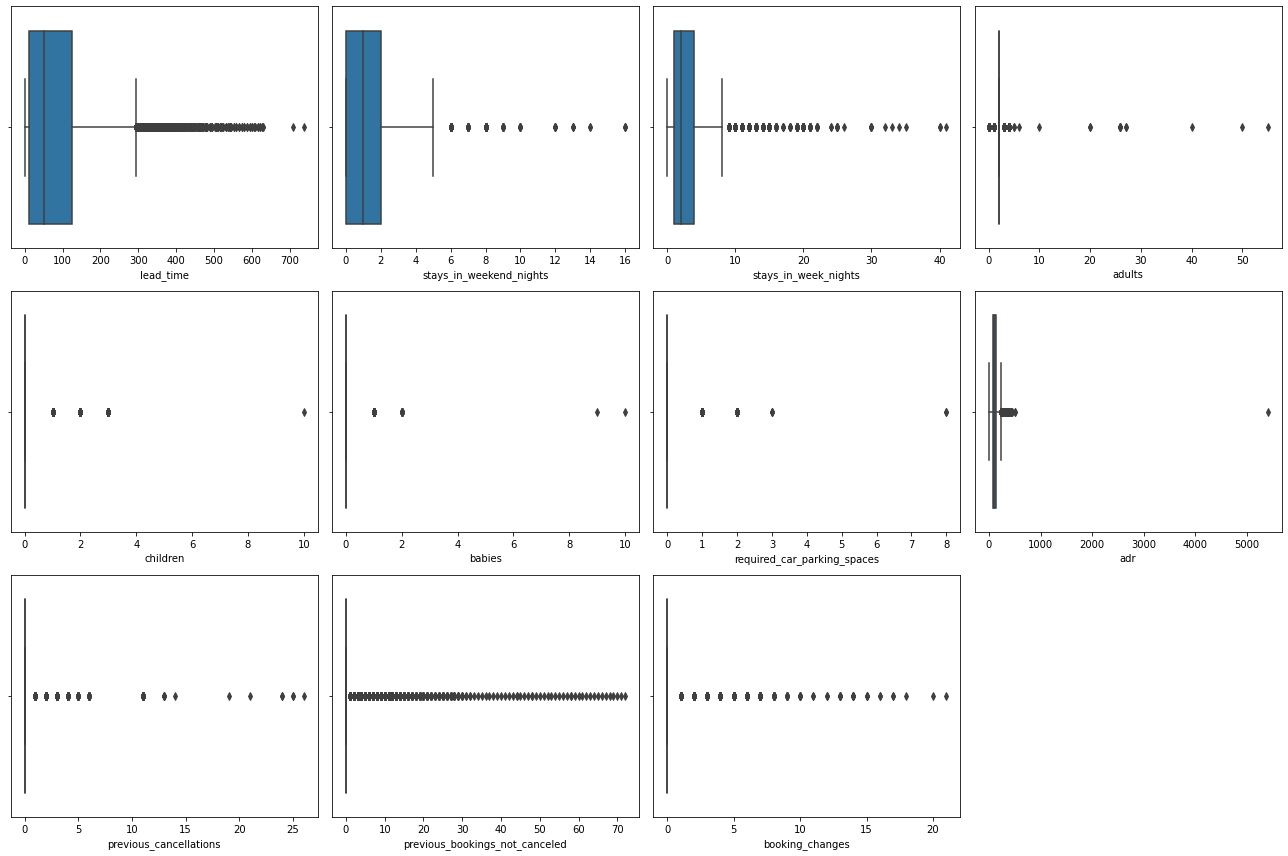

In [ ]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(18,12))

for column in columns:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()
plt.show()

As we can see that most of the outliers for almost all of the parameters are more than the upper limit. Hence , we have chosen to replace the outliers by the value on the right whisker of the box plot. Another option was to remove the rows with outlier values, but that will reduce the data set by almost 70%. We can lose a lot of valueable information that way. Hence, we remove the outliers by using conditionals to get and update these values.

In [ ]:
df.loc[df.lead_time > 450, 'lead_time'] = 450
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 10, 'adults'] = 10
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 8, 'stays_in_week_nights'] = 8
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 400, 'adr'] = 400

* We removed the outliers. Our data is clean now.

**Overview of Numerical Features**

In [ ]:
numeric_features= df.describe().columns
print(numeric_features)
print(len(numeric_features))

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
18



* We have 18 numeric features in our dataset out of 30 features.

Let's check the data types of each column present in our dataset.

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

**Feature Creation**

In [ ]:
#Merge children and babies columns to a kids column.
df['kids'] = df.children + df.babies

#Create a total mumbers feature by adding kids and adults
df['total_members'] = df.kids + df.adults

In [ ]:
#Convering numerical value [0,1] to categorical for better understanding.
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
df['is_repeated_guest']= df.is_repeated_guest.replace([1,0] , ['repeated_guest','not a repeated guest'])

In [ ]:
#convert the int datatypes to object
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')

Let's again check the data types of each column.

In [ ]:
df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month          object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

* Now we have all the columns in the correct format.

Let's again check the duplicates in our dataset.

In [ ]:
len(df[df.duplicated()])

74

In [ ]:
df.count()

hotel                             86940
is_canceled                       86940
lead_time                         86940
arrival_date_year                 86940
arrival_date_month                86940
arrival_date_week_number          86940
arrival_date_day_of_month         86940
stays_in_weekend_nights           86940
stays_in_week_nights              86940
adults                            86940
children                          86940
babies                            86940
meal                              86940
country                           86940
market_segment                    86940
distribution_channel              86940
is_repeated_guest                 86940
previous_cancellations            86940
previous_bookings_not_canceled    86940
reserved_room_type                86940
assigned_room_type                86940
booking_changes                   86940
deposit_type                      86940
days_in_waiting_list              86940
customer_type                     86940


In [ ]:
#Remove the duplicates
df= df.drop_duplicates()
len(df[df.duplicated()])

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86866 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86866 non-null  object 
 1   is_canceled                     86866 non-null  object 
 2   lead_time                       86866 non-null  int64  
 3   arrival_date_year               86866 non-null  object 
 4   arrival_date_month              86866 non-null  object 
 5   arrival_date_week_number        86866 non-null  int64  
 6   arrival_date_day_of_month       86866 non-null  object 
 7   stays_in_weekend_nights         86866 non-null  int64  
 8   stays_in_week_nights            86866 non-null  int64  
 9   adults                          86866 non-null  int64  
 10  children                        86866 non-null  float64
 11  babies                          86866 non-null  int64  
 12  meal                           

* We are left with 86867 entries and and 32 features in our dataset.


# **Data Analysis**
# **Univariate Analysis**

Let's understand some features in our dataset.

*   The feature 'is_canceled' and 'is_repeated_guest' having 0 and 1 values present in it. 
*   For 'is_canceled'
    1. 0 : 'not_canceled'
    2. 1 : 'canceled'
*   For 'is_repeated_guest'.
    1. 0 : 'no'
    2. 1 : 'yes'

Types of hotel present in our dataset.

In [ ]:
df['hotel'].value_counts()

City Hotel      53385
Resort Hotel    33481
Name: hotel, dtype: int64

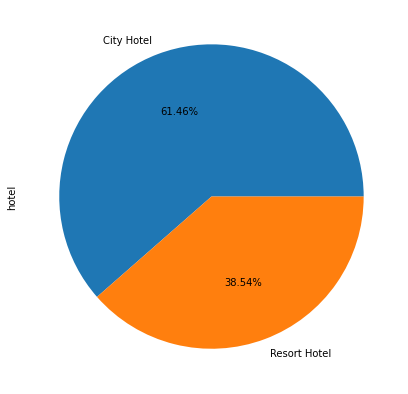

In [ ]:
fig= plt.figure(figsize=(15,7))
df['hotel'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

* There are only 2 hotels i.e. 'City Hotel' and 'Resort Hotel'. City Hotel has more bookings as compared to bookings at the Resort Hotel.


Let's see the numerical features.

In [ ]:
numeric_features= df.describe().columns
print(numeric_features)
print(len(numeric_features))

Index(['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'kids',
       'total_members'],
      dtype='object')
16


* There are 16 numeric features available in dataset.

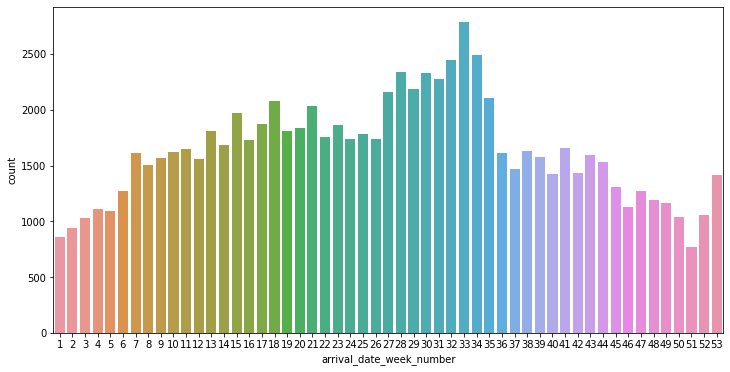

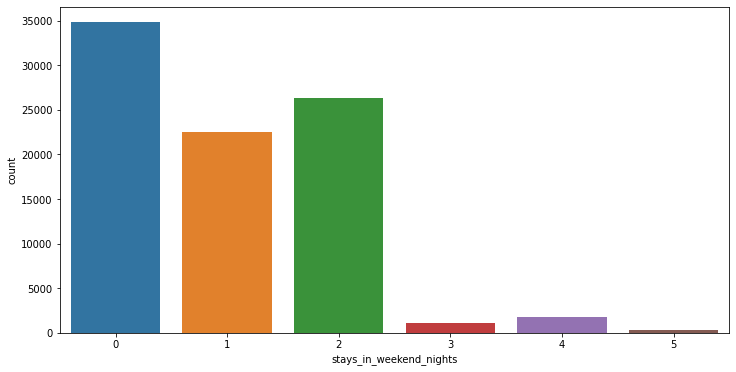

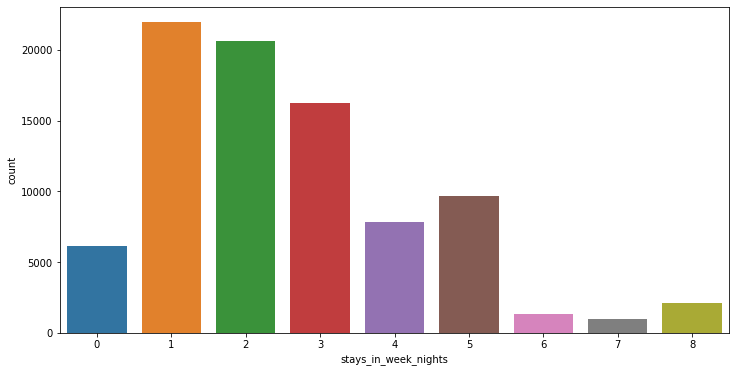

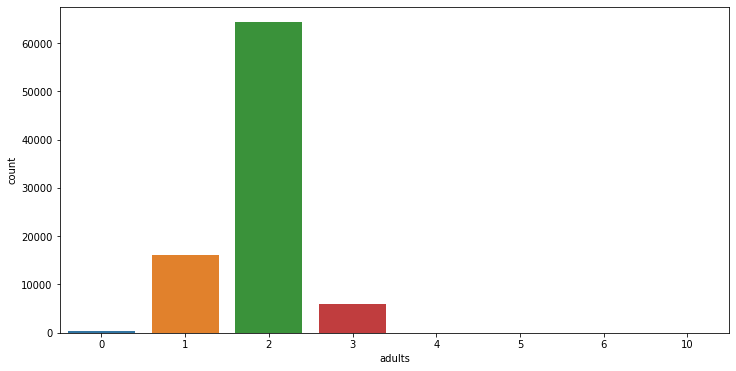

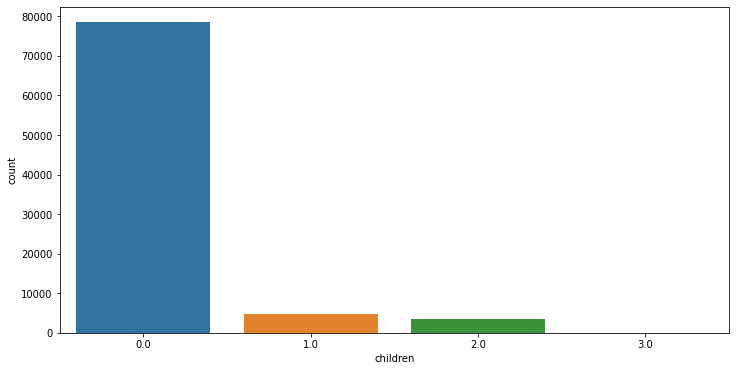

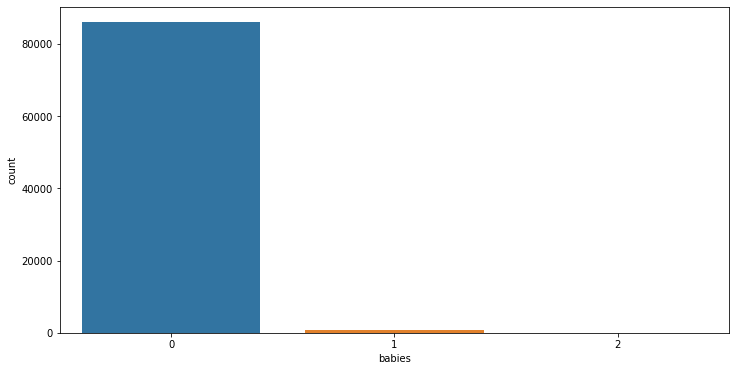

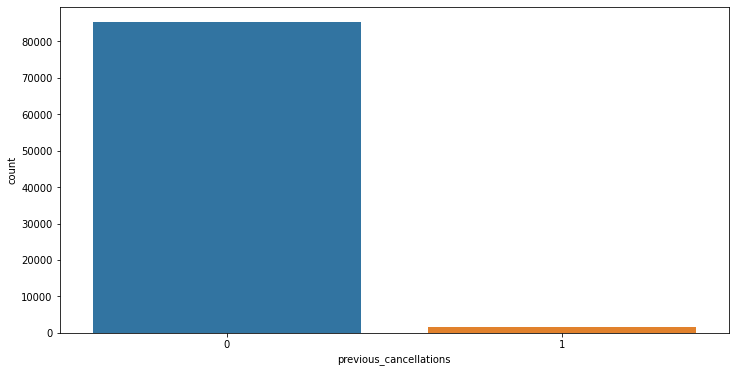

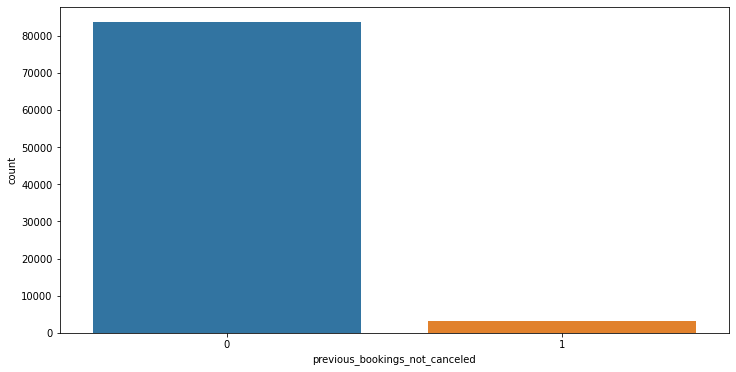

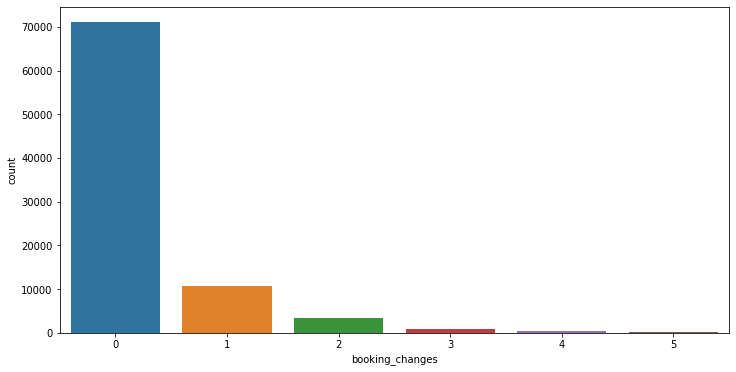

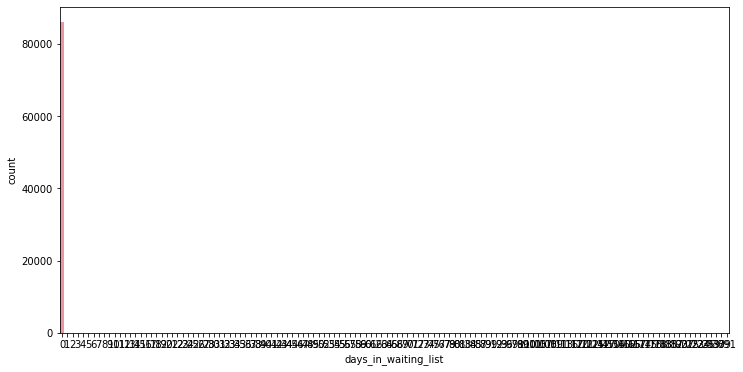

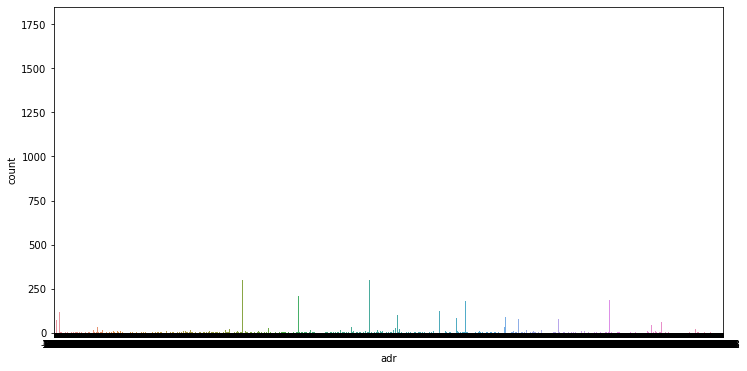

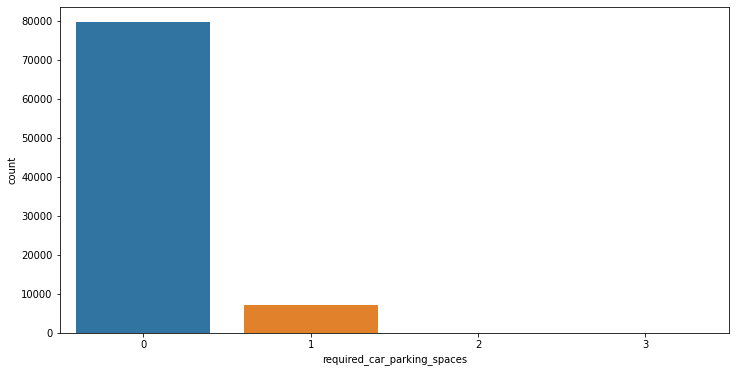

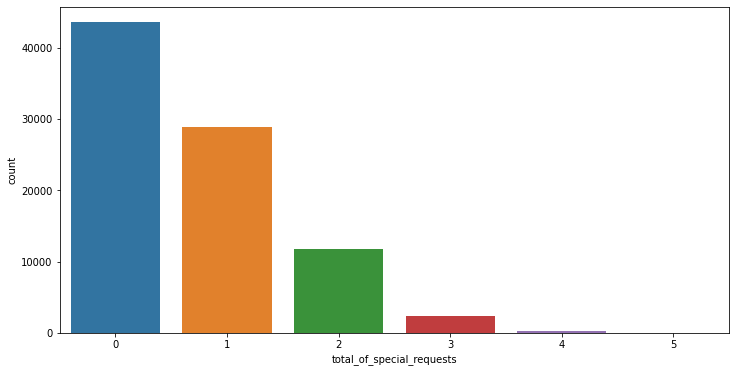

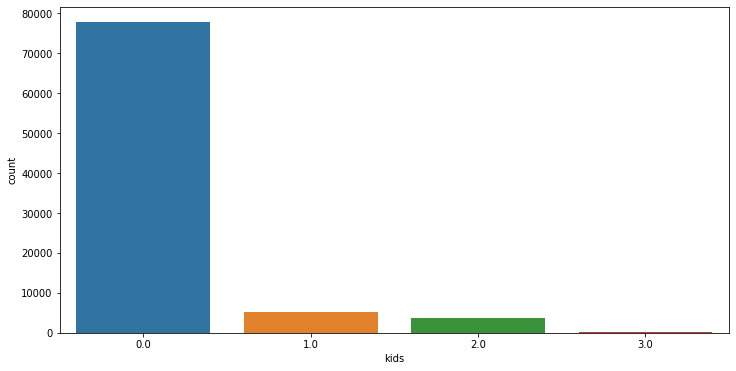

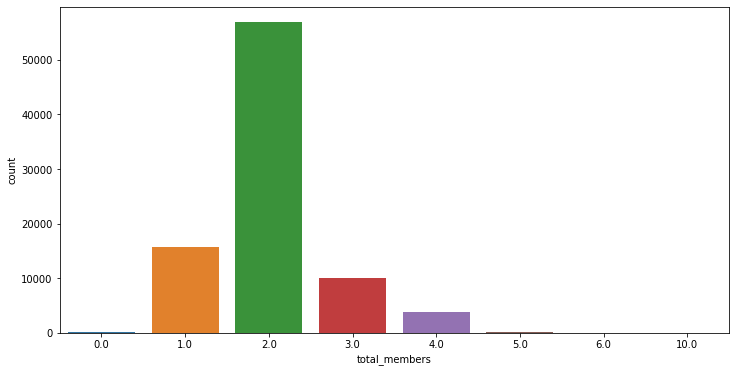

In [ ]:
for column in numeric_features[1:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[column], x= column, ax= ax)
plt.show()

In [ ]:
df.required_car_parking_spaces.sum()

7236

In [ ]:
df.booking_changes.sum()

23138

In [ ]:
df.total_members.sum()

175977.0

**Observation**



* 7,236 car parking spaces have been used.
* There were 23,138 registered changes in the bookings during this period.
* 1,75,977 people have been registered in the hotel.

**Overview of each categorical features.**

In [ ]:
categorical_features= df.describe(include=['object']).columns
print(categorical_features)
print(len(categorical_features))

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
16


* There are 16 categorical features in the dataset.

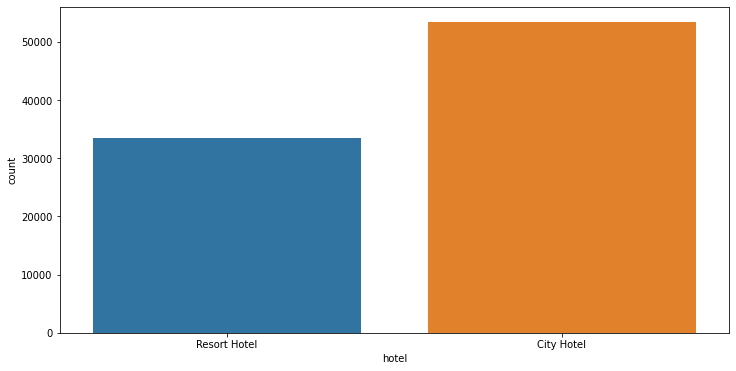

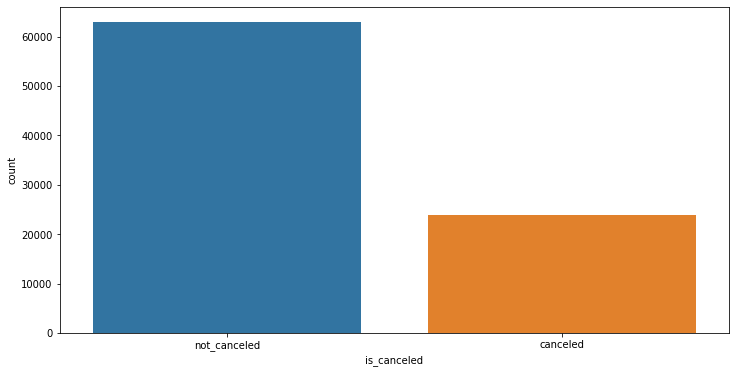

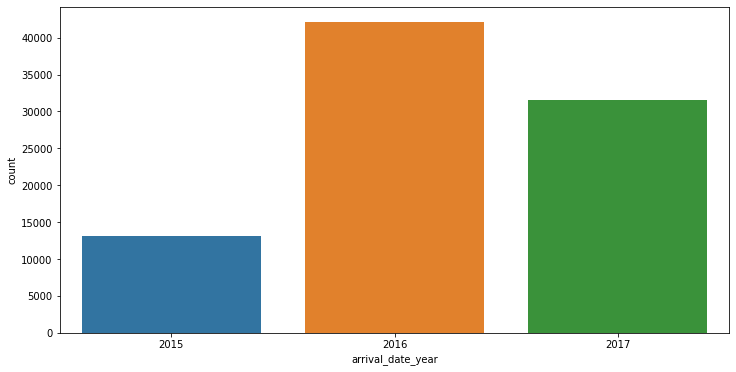

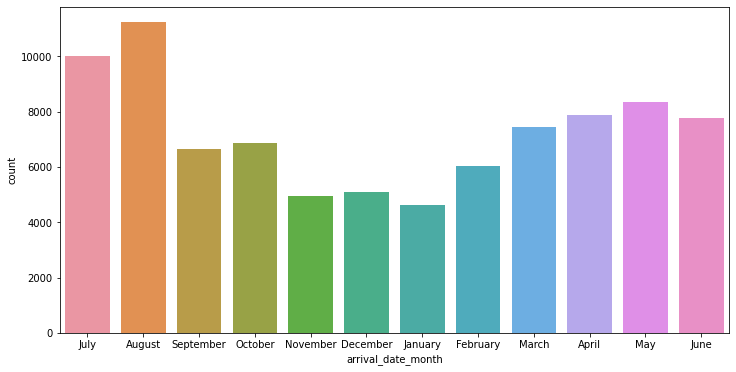

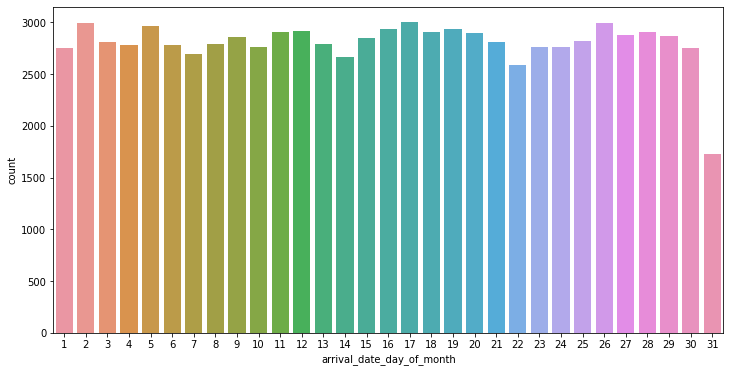

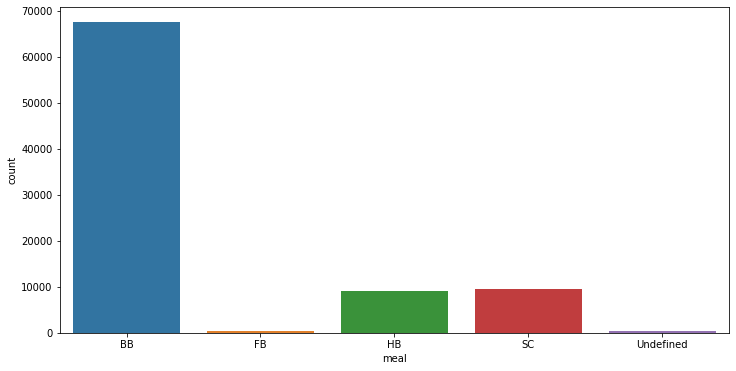

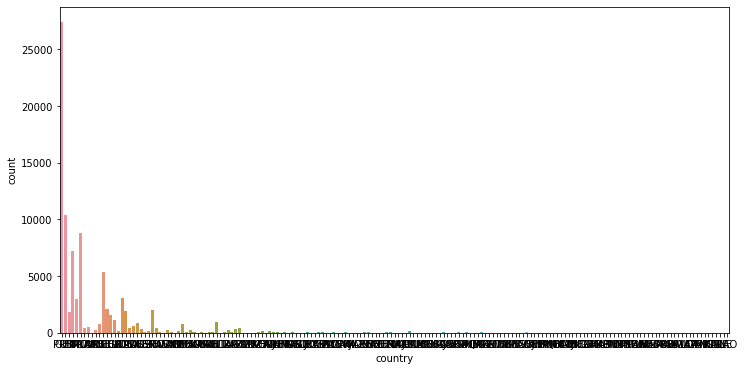

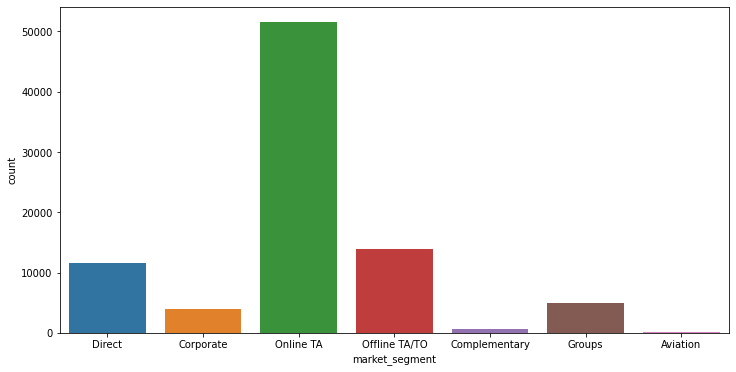

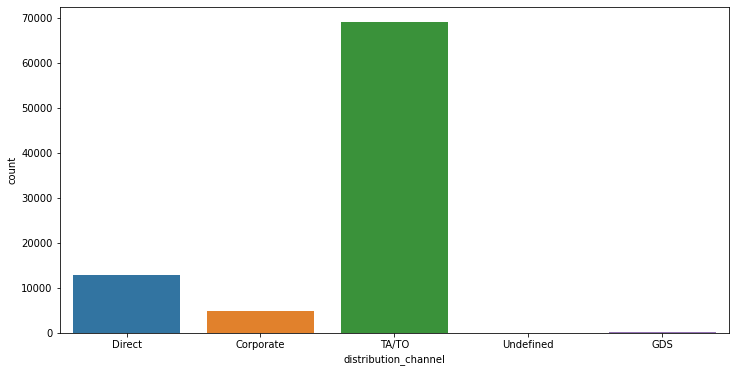

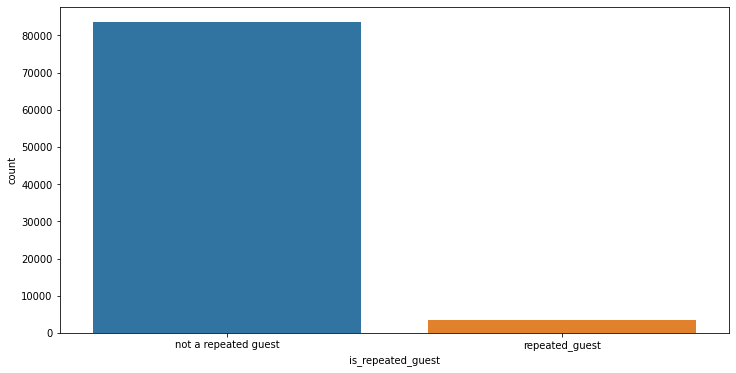

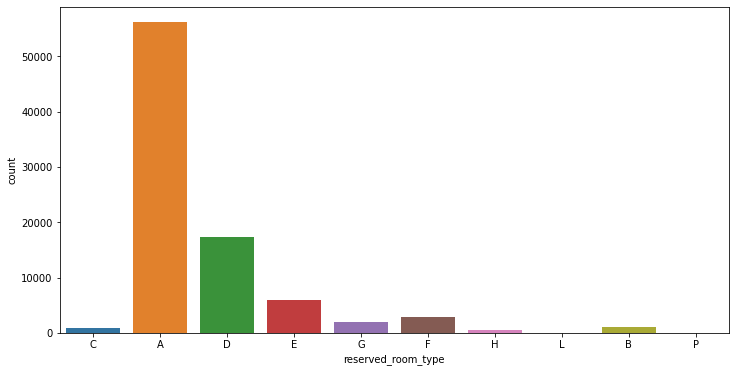

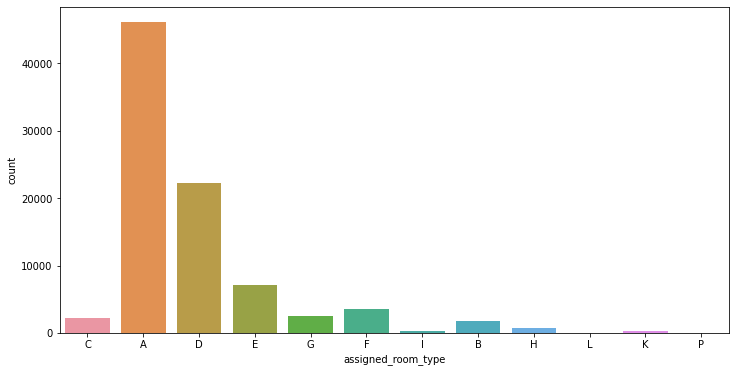

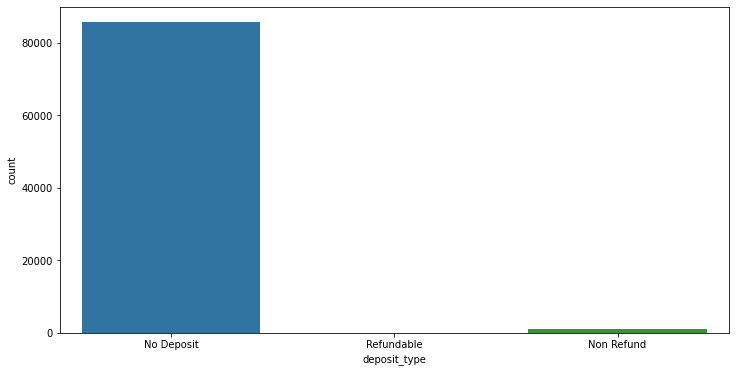

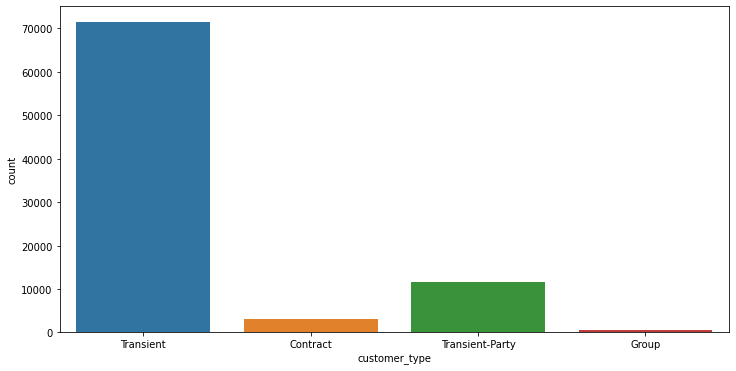

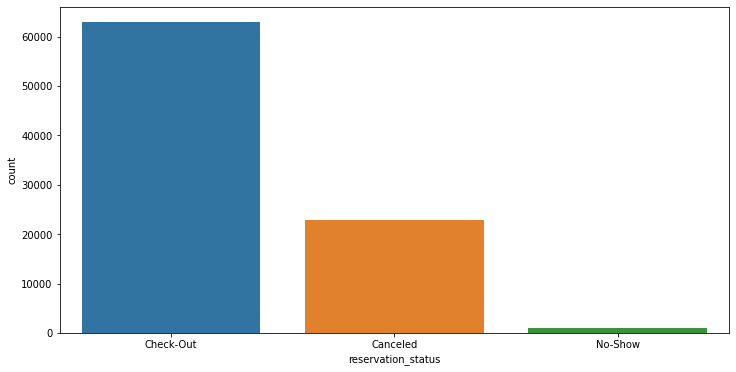

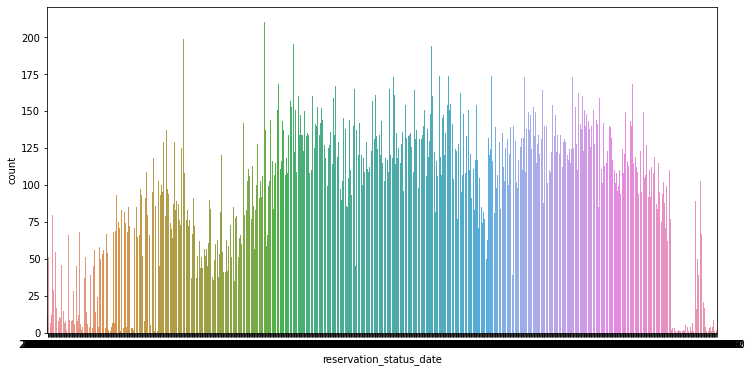

In [ ]:
for column in categorical_features:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[column], x= column, ax= ax)
plt.show()

**Point of concern**: The data has been collected for 3 years. There is a steep rise in bookings between 2015 and 2016 and then a drop between 2016 and 2017. This kind of fluctuation may not be normal. This needs to be further investigated

**Due to the anomaly seen in the trend of bookings over the years, we would like to check the months for which the data was collected for each of the years**

In [ ]:
# Checking the months for which the data was collected for each year

months_per_year = pd.DataFrame(df.groupby('arrival_date_year')['arrival_date_month'].value_counts())
months_per_year

arrival_date_month
arrival_date_year arrival_date_month                    
2015              September                         2815
                  October                           2675
                  August                            2435
                  December                          1960
                  July                              1659
                  November                          1642
2016              August                            4414
                  October                           4202
                  September                         3835
                  July                              3828
                  March                             3795
                  May                               3765
                  April                             3741
                  June                              3502
                  November                          3306
                  December                          3117
                  February                          2769
                  January                           1813
2017              May                               4572
                  July                              4530
                  August                            4379
                  June                              4248
                  April                             4122
                  March                             3657
                  February                          3265
                  January                           2820

Hence, we can see that only 6 months of data was collected in 2015 and only 8 months of data was collected in 2017. Data collected started only in July, 2015 and ended in August, 2017.

This finding is very significant as many of the analysis, such as the most popular month for booking either hotel, will lose significance. The only common months across the three years of data are July and August.

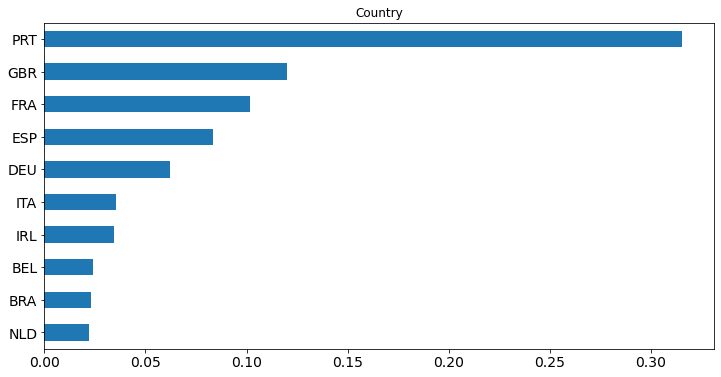

In [ ]:
# Country univariant analysis only for top 10 countries
fig, axes = plt.subplots(1, 1, figsize=(12, 6)) 
_ = df['country'].value_counts(normalize=True).head(10).sort_values(ascending=True).plot(kind = 'barh', title='Country', fontsize=14)

* The above bar graph shows the Portugal is one of the top country followed by Great Britain, and France from where most people booked the hotels.

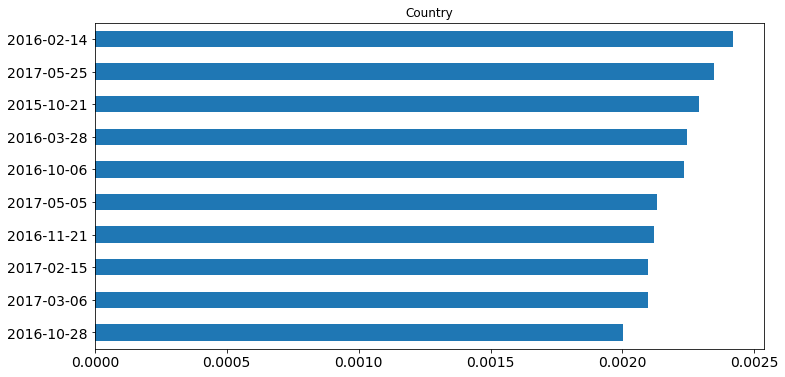

In [ ]:
# Country univariant analysis only for top 10 date
fig, axes = plt.subplots(1, 1, figsize=(12, 6)) 
_ = df['reservation_status_date'].value_counts(normalize=True).head(10).sort_values(ascending=True).plot(kind = 'barh', title='Country', fontsize=14)

In [ ]:
df['is_repeated_guest'].value_counts(normalize=True)*100

not a repeated guest    96.112403
repeated_guest           3.887597
Name: is_repeated_guest, dtype: float64

In [ ]:
df['reserved_room_type'].value_counts(normalize=True)*100

A    64.608708
D    19.992863
E     6.915249
F     3.241775
G     2.349596
B     1.145442
C     1.052195
H     0.686114
L     0.006907
P     0.001151
Name: reserved_room_type, dtype: float64

In [ ]:
df['assigned_room_type'].value_counts(normalize=True)*100

A    53.069095
D    25.631432
E     8.196533
F     4.152373
G     2.859577
C     2.468169
B     2.090576
H     0.808141
I     0.404071
K     0.317731
L     0.001151
P     0.001151
Name: assigned_room_type, dtype: float64

In [ ]:
df['reservation_status'].value_counts(normalize=True)*100

Check-Out    72.409228
Canceled     26.428062
No-Show       1.162710
Name: reservation_status, dtype: float64

**Observation**
* From the above data we can say that majority of the booking were not canceled.

* The number of bookings rising between 2015 and 2016 and then dropping again next year is due to incomplete data collection in 2015 and 2017.

* Due to the above reason, checking for bookings per month over the years to check for popular months loses significance.

* Most of the people prefer bed breakfast BB as their meal type during the stay

* Most of the market_segment used is Online Travel Agents.

* Most distributed channel is Online TA/TO.

* About 96% of guests are new guests.

* The 'A' room type is the most popular among the clients, with 62.62% of the reservations. The room type 'A' was assighned to only 50.08% people. A very little percetage of booking was held for room type 'P'.

* Transients are the most common customer type.

* 26% reservation are canceled by guests.

# **Bivariate Analysis**

**Overview of each features with the hotel**

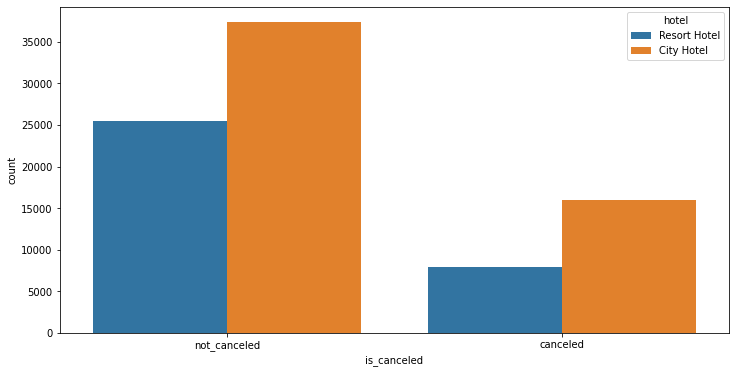

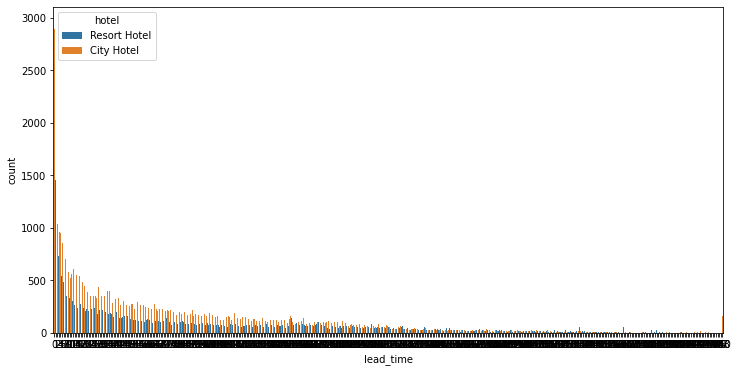

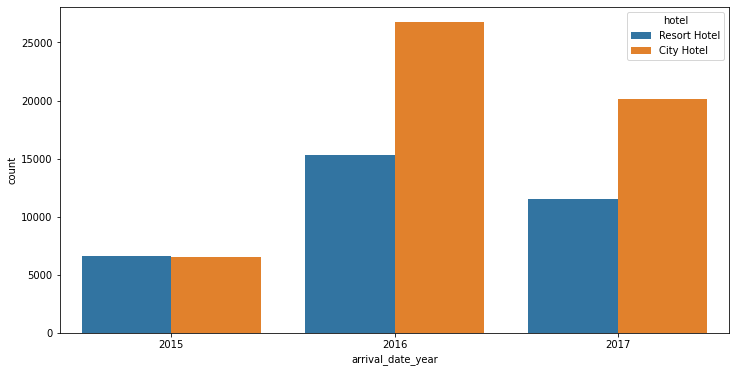

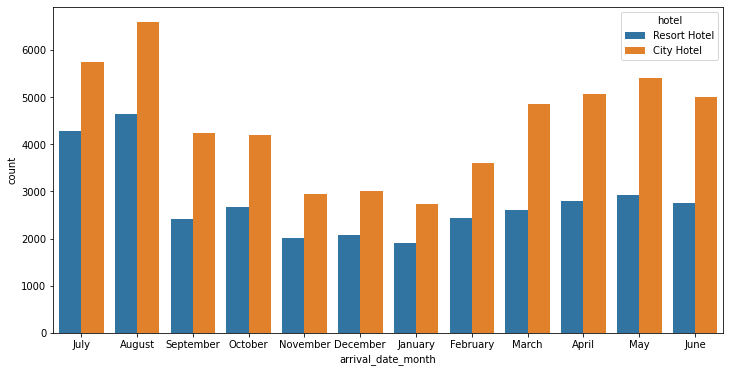

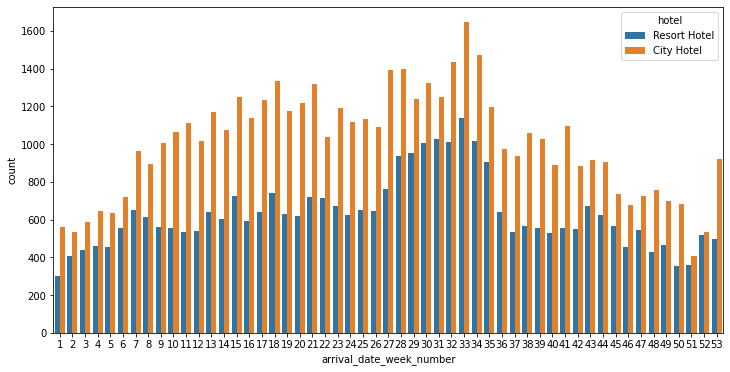

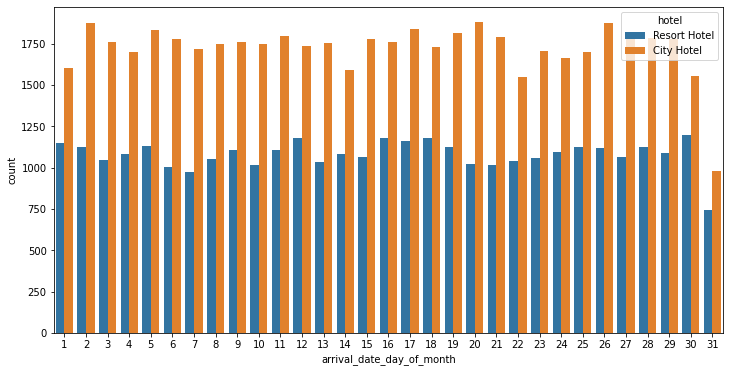

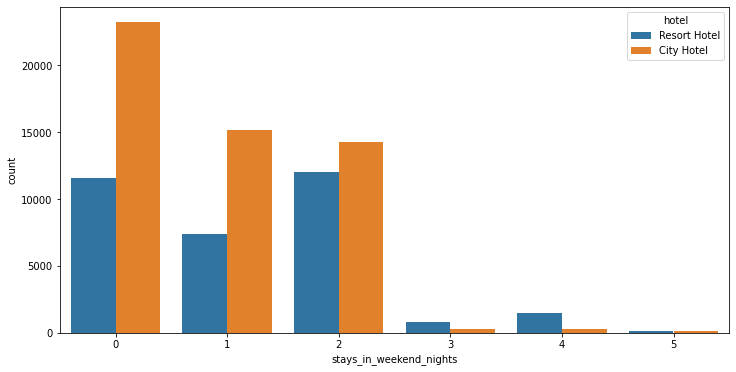

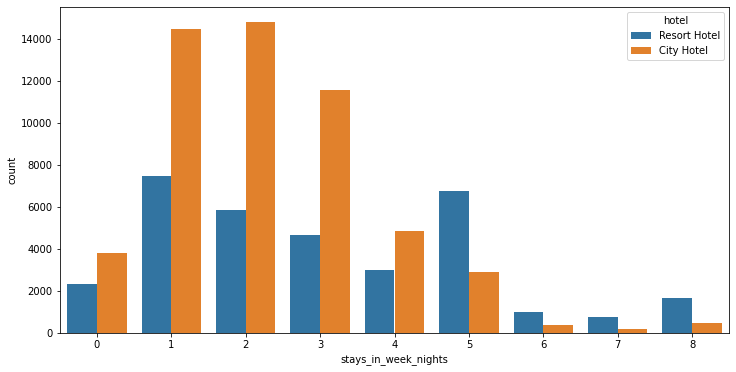

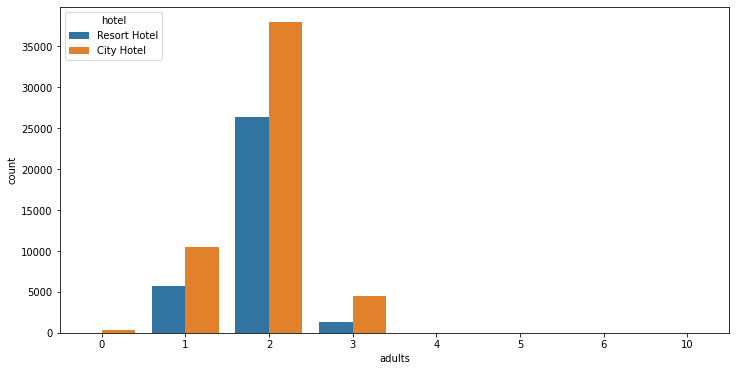

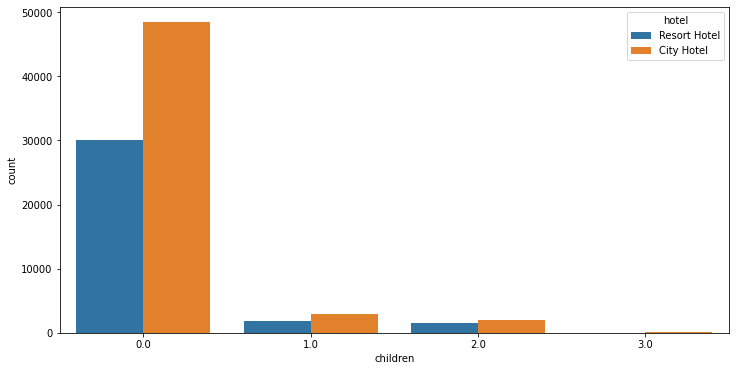

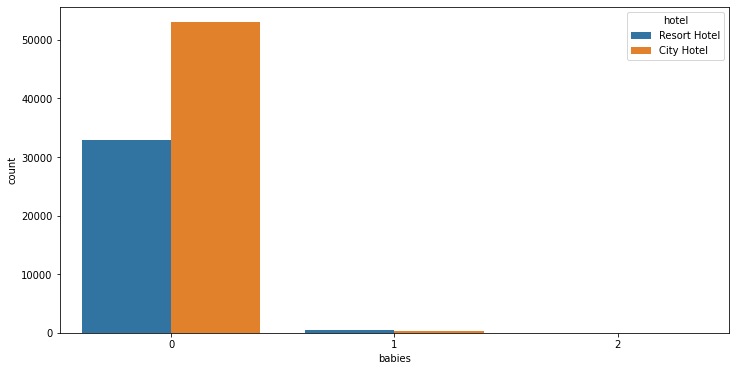

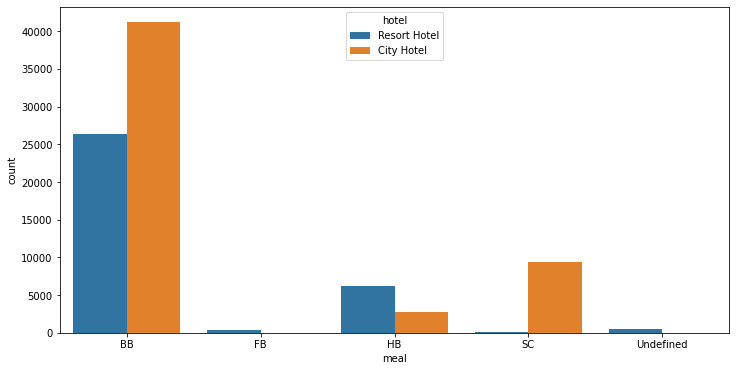

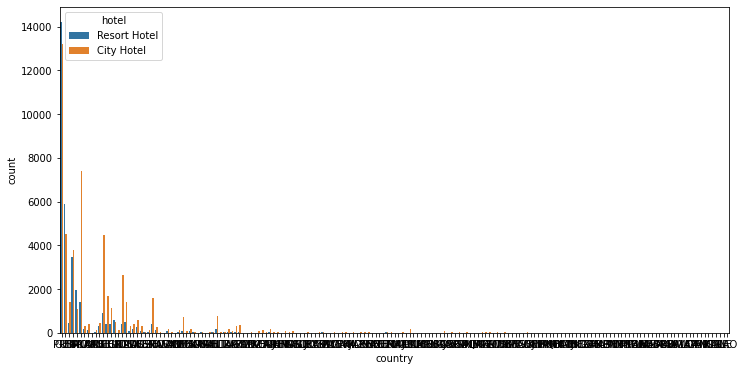

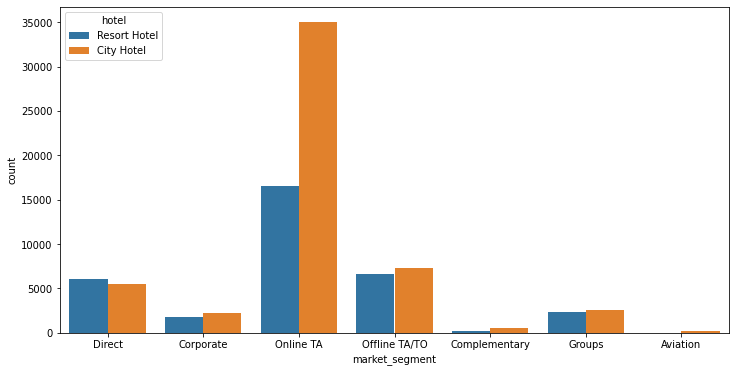

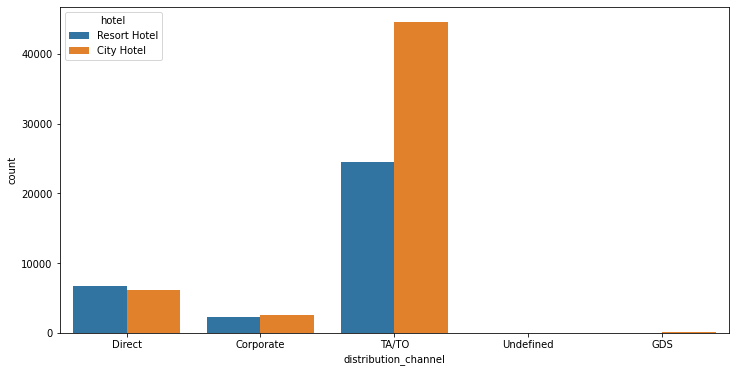

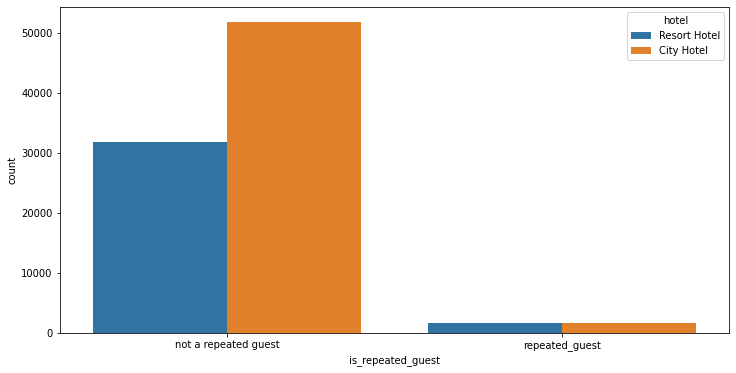

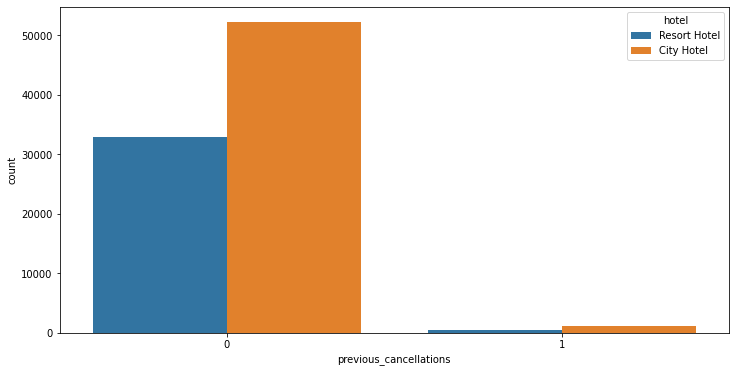

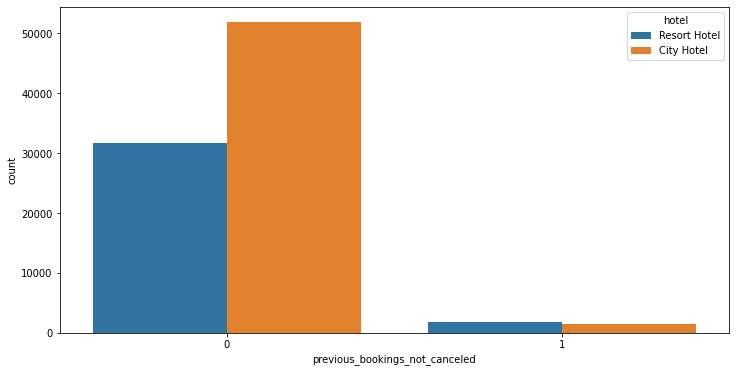

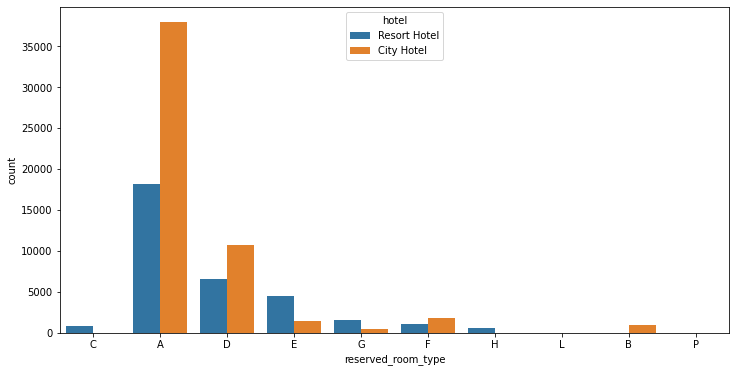

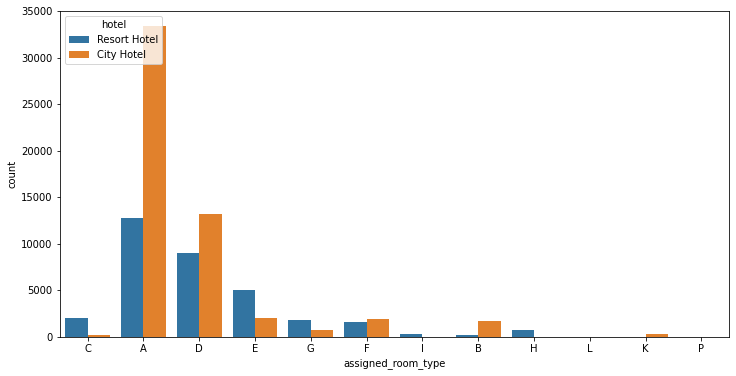

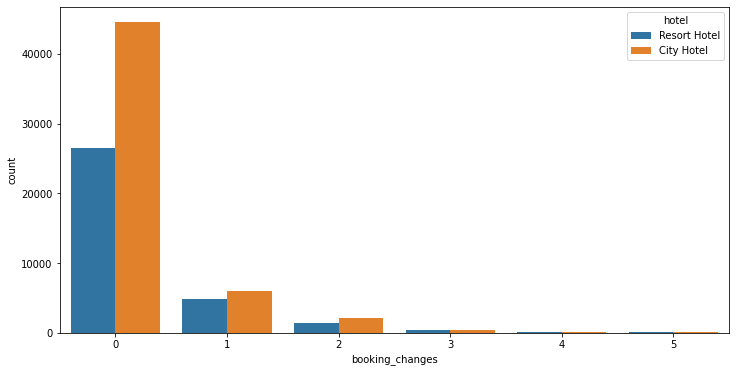

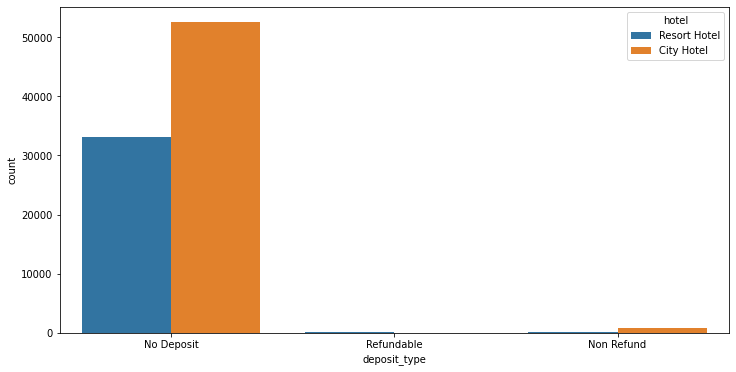

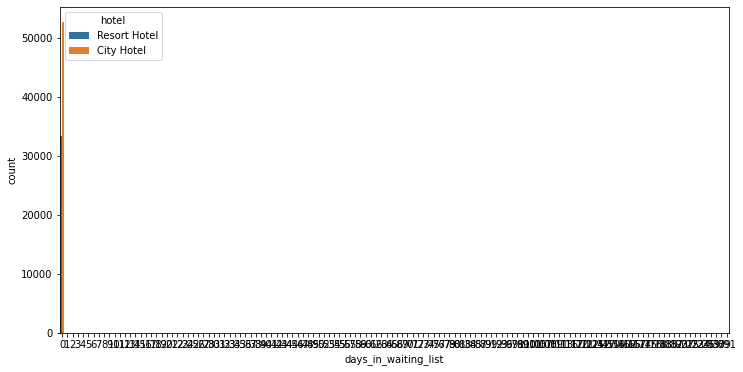

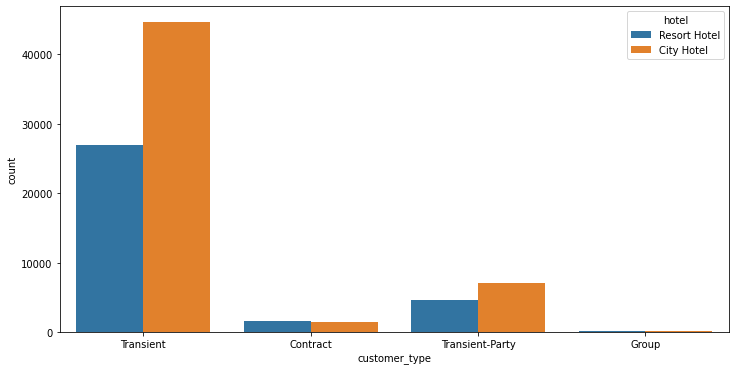

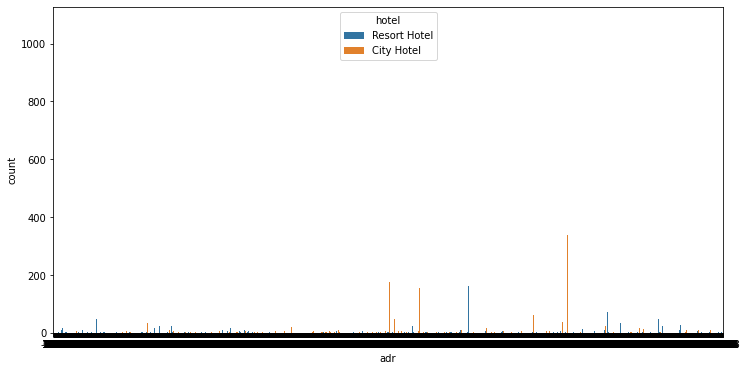

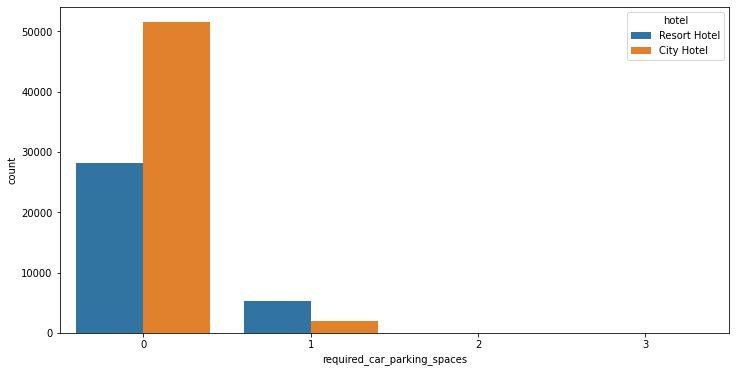

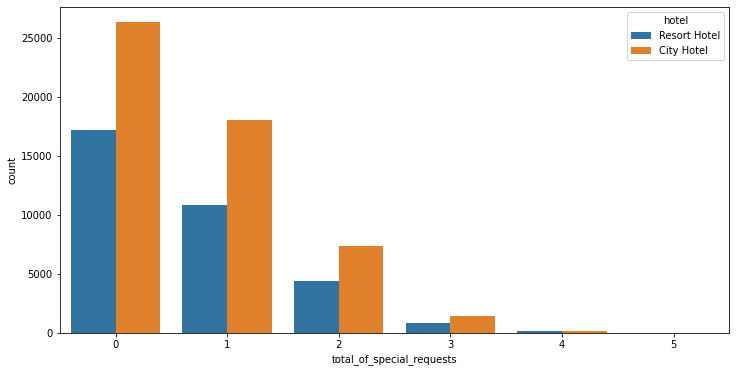

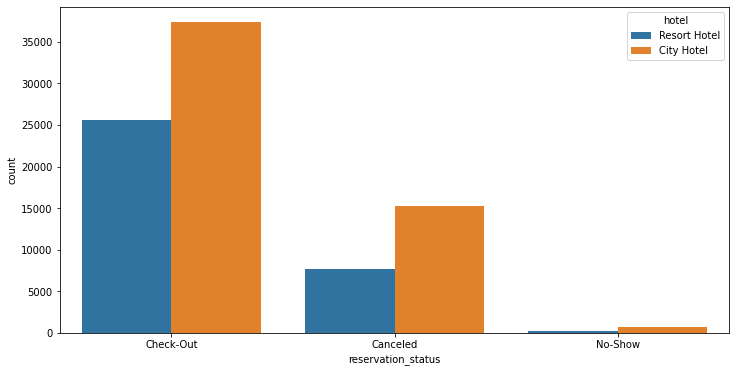

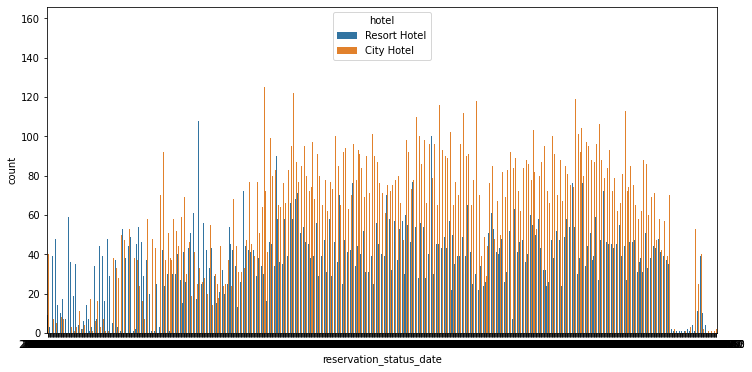

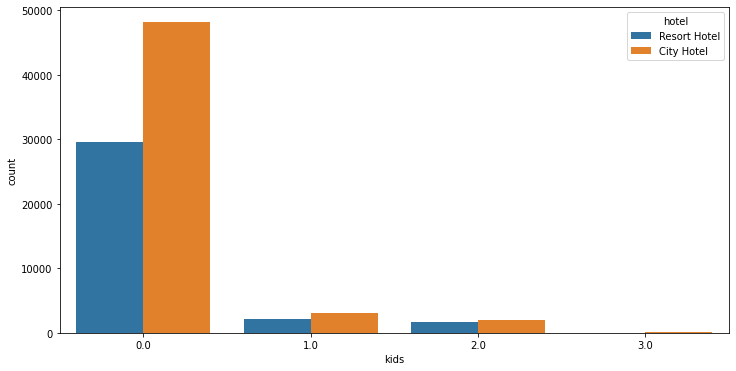

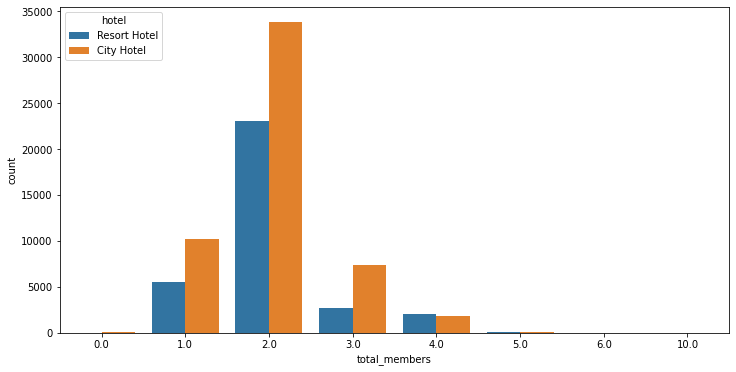

In [ ]:
for column in df.columns[1:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[column], x= column, hue=df['hotel'], ax= ax)
plt.show()

**Observation**
* City Hotels have more number of cancelation than the Resort Hotel. However this is also because there is an overall more bookings for city hotel.
* From market_segment and distribution_channel we can observe that City Hotel is more into 'Online TA'.
* From meal we can observe that City Hotel and Resort Hotel both  provide 'BB' and 'HB'. 'BB' meal is the most booked meal by the guest in both City Hotel and Resort Hotel.
* City Hotel is more non-refund as compare to Resort Hotel.
* In City Hotel there are more non-repeated guest as compare to Resort Hotel.

**Whether the hotel booking is canceled and the customer is repeated guest or not**

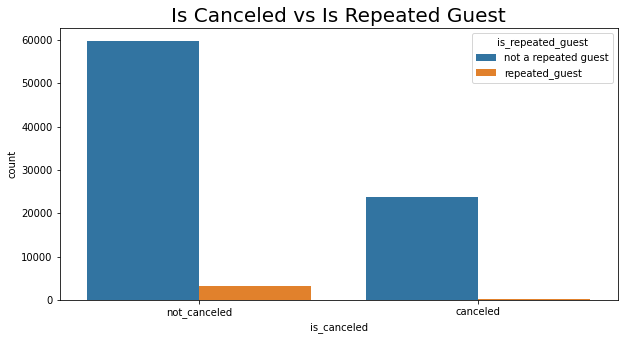

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.countplot(data= df[['is_canceled', 'is_repeated_guest']], x= df['is_canceled'], hue=df['is_repeated_guest']).set_title('Is Canceled vs Is Repeated Guest', fontsize=20)
plt.show()

* Here, we see that when hotel booking is canceled and the customer is a repeated guest having entries is almost 0. That means the hotel booking that is canceled is very less likely to be canceled by a repeated guest. 

**Lets check the proportion of repeated guests for both the hotels**


In [ ]:
df_rep_guest = df.groupby('market_segment')['is_repeated_guest'].value_counts().unstack()
df_rep_guest

is_repeated_guest,not a repeated guest,repeated_guest
market_segment,,
Aviation,164,63
Complementary,474,223
Corporate,2580,1420
Direct,10869,771
Groups,4875,55
Offline TA/TO,13577,268
Online TA,50950,577


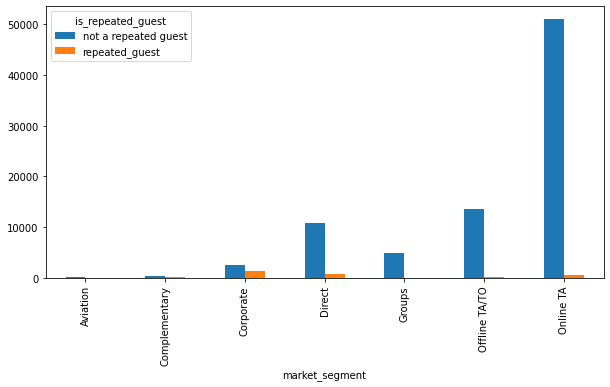

In [ ]:
df_rep_guest.plot(kind = 'bar', figsize = (10,5))

The highest proportion of repeated guest is from the complimentary segment, however the guests from this segment are very few

Second highest proportion of repeated guests is from the Corporate segment. This could be because people returning to the same place for their work purposes.

**Reservation Status and Market Segment**

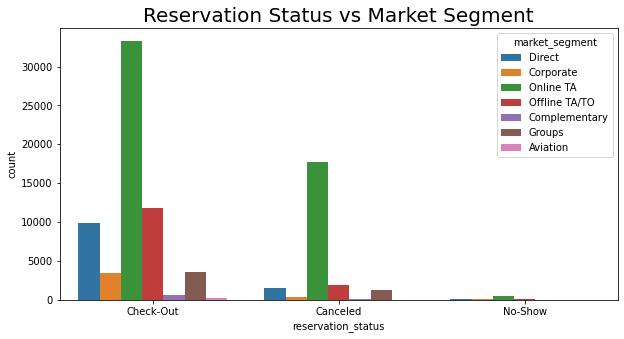

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.countplot(data= df[['reservation_status', 'market_segment']], x= df['reservation_status'], hue=df['market_segment']).set_title('Reservation Status vs Market Segment', fontsize=20)
plt.show()

* Most of the booking either in the canceled status or in check-out status are done by the online travel agencies (online TA). The ratio of cancelations to bookings is also the highest for Online TA.

**Overview of Arrival month and Lead time.**

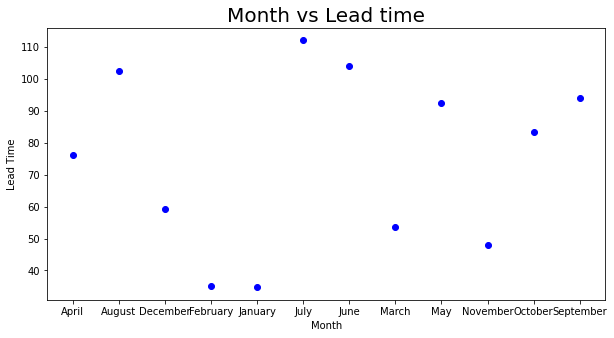

In [ ]:
df1= pd.DataFrame(df.groupby(['arrival_date_month'])['lead_time'].mean())
fig= plt.figure(figsize=(10,5))
plt.plot(df1, 'bo')
plt.title('Month vs Lead time', fontsize=20)
plt.xlabel("Month")
plt.ylabel('Lead Time')
plt.show()

* In the month of July the average lead time is maximum.

**Overview of Arrival month and Booking Changes**

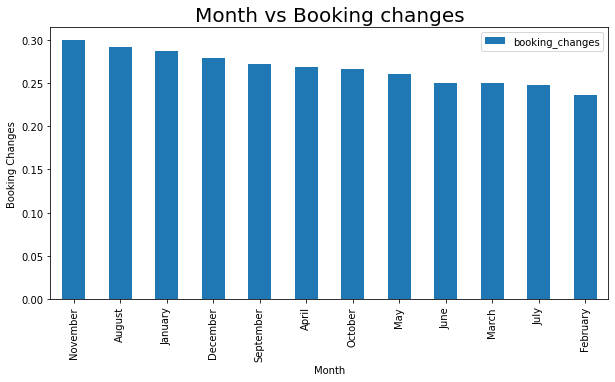

In [ ]:
df2= pd.DataFrame(df.groupby(['arrival_date_month'])['booking_changes'].mean().sort_values(ascending=False))
df2.plot.bar(figsize= (10, 5))
plt.title('Month vs Booking changes', fontsize=20)
plt.xlabel("Month")
plt.ylabel('Booking Changes')
plt.show()

* Here we can see that on averge, in November month a lot of booking changes were made, closely followed by August, January and December.

**Overview of Arrival month and Stays on week nights**

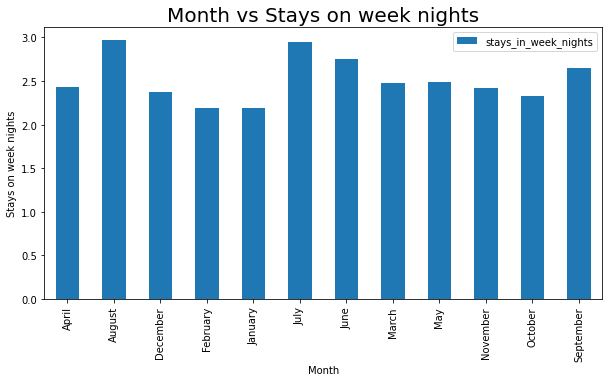

In [ ]:
df3= pd.DataFrame(df.groupby(['arrival_date_month'])['stays_in_week_nights'].mean())
df3.plot.bar(figsize= (10, 5))
plt.title('Month vs Stays on week nights', fontsize=20)
plt.xlabel("Month")
plt.ylabel('Stays on week nights')
plt.show()

* In the August and July month most of the customer booked the hotel to stays on week nights.

**Overview of Arrival month and Stays on weekend nights**

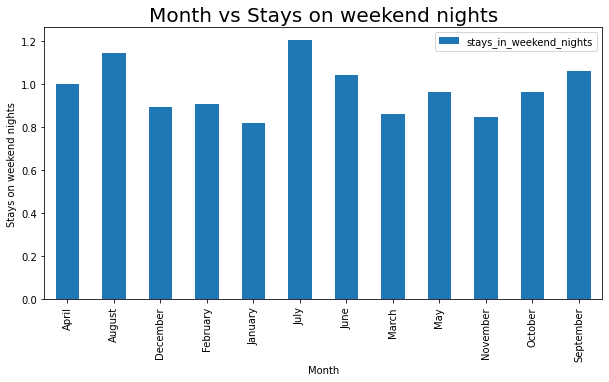

In [ ]:
df3= pd.DataFrame(df.groupby(['arrival_date_month'])['stays_in_weekend_nights'].mean())
df3.plot.bar(figsize= (10, 5))
plt.title('Month vs Stays on weekend nights', fontsize=20)
plt.xlabel("Month")
plt.ylabel('Stays on weekend nights')
plt.show()

* Most of the customers booked the hotel to stay on weekend nights in July month. Whereas in January month, few customers booked the hotel to stays on weekend nights.

**Overview of Arrival month and Days in waiting list**

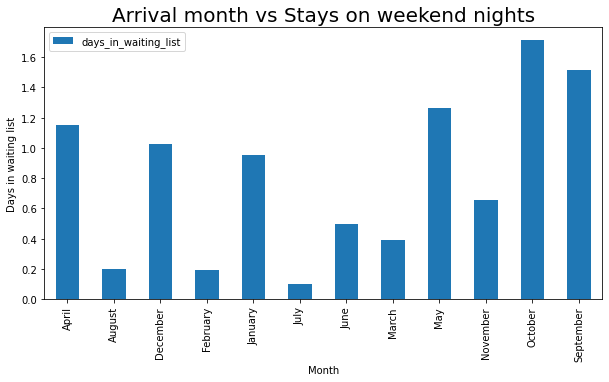

In [ ]:
df3= pd.DataFrame(df.groupby(['arrival_date_month'])['days_in_waiting_list'].agg(np.mean))
df3.plot.bar(figsize= (10, 5))
plt.title('Arrival month vs Stays on weekend nights', fontsize=20)
plt.xlabel("Month")
plt.ylabel('Days in waiting list')
plt.show()

* In October month, the number of days in waiting list is higher. It means a customer has to wait for a longer time to book the hotel in October month. This can likely be a situation where customer had made a booking in previous month i.e. before October but it had been in the waiting list and then the booking was confirmed in October.

**Average Daily Rate (ADR) and Months**

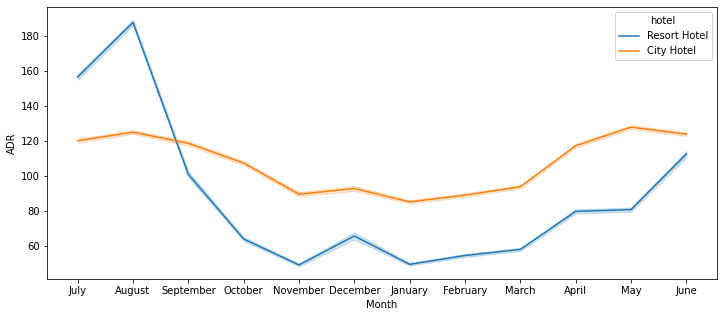

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.xlabel("Month")
plt.ylabel("ADR")
plt.show()

* For resort hotels, the average daily rate is more expensive during august, july and september.
* For city hotels, the average daily rate is more expensive during august, july, june and may.

# **Correlation Analysis**

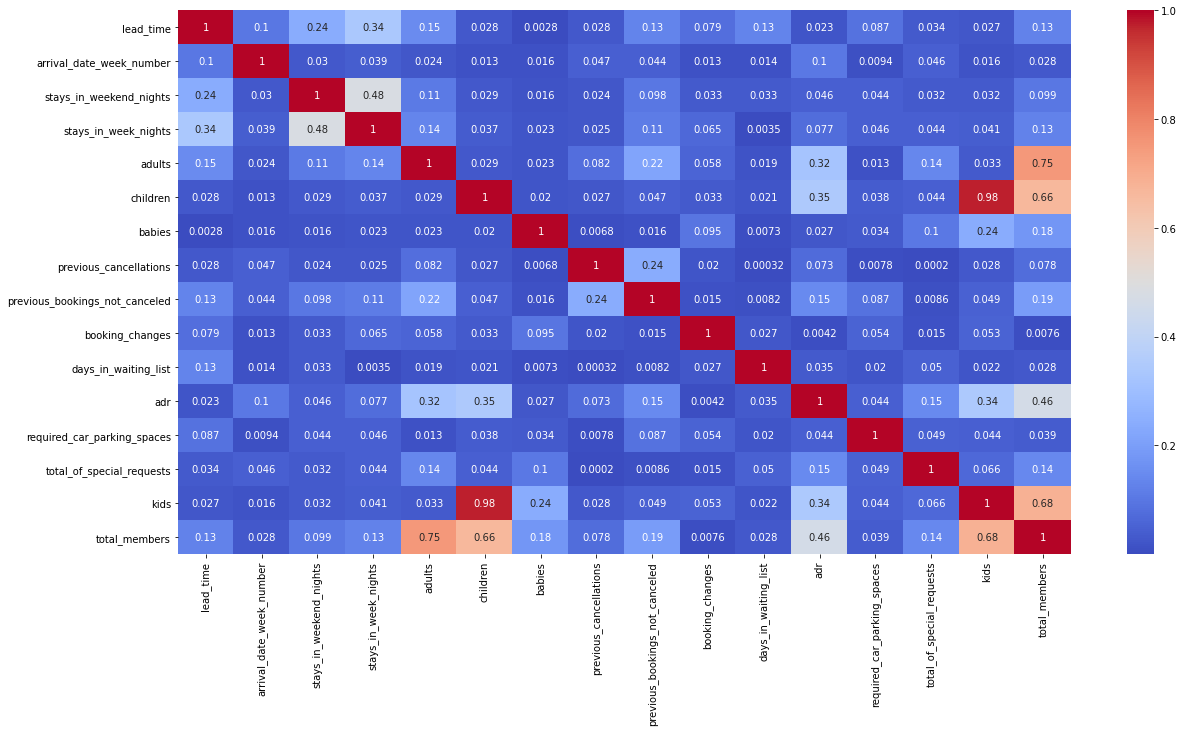

In [ ]:
plt.figure(figsize=(20,10))
corelation= df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='coolwarm')

A **correlation matrix** is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

# **Conclusion**

* The majority of guests come from western europe countries.
* the majority of reservations are for city hotels.
* The number of repeated guests is too low.
* The majority of reservations converts into successful transactions.
* As the number of children increases, the preference for Resort Hotel increases